# Task 1: Exploratory Data Analysis (EDA)

This notebook contains the full EDA process for the ACIS Car Insurance Challenge.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 📥 Load Dataset


In [5]:
# Load the pipe-delimited dataset
file_path = "../data/insurance.txt"
df = pd.read_csv(file_path, delimiter='|')
df.head()


/tmp/ipykernel_82880/516699535.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## 🧾 Dataset Overview


In [6]:
df.shape


(1000098, 52)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [8]:
df.describe(include='all')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1000098,1000098,1000098,1000098,1000098,854137,959866,...,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1.000098e+06,1.000098e+06
unique,NaN,NaN,23,2,4,6,5,1,11,3,...,13,28,22,14,5,4,1,1,NaN,NaN
top,NaN,NaN,2015-08-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,NaN,NaN
freq,NaN,NaN,106747,995075,895210,911929,933555,1000098,260811,597938,...,791235,104158,104183,824124,828125,915028,1000098,1000098,NaN,NaN
mean,1.048175e+05,7.956682e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.192982e+01,0.000000e+00


## 🔍 Missing Values


In [9]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
WrittenOff                  641901
Converted                   641901
Rebuilt                     641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
mmcode                         552
VehicleType                    552
make                           552
VehicleIntroDate               552
NumberOfDoors                  552
bodytype                       552
kilowatts                      552
cubiccapacity                  552
Cylinders                      552
Model                          552
CapitalOutstanding               2
dtype: int64

## 🛠 Feature Engineering


In [10]:
# Convert transaction date
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan)


## 📊 Univariate Analysis


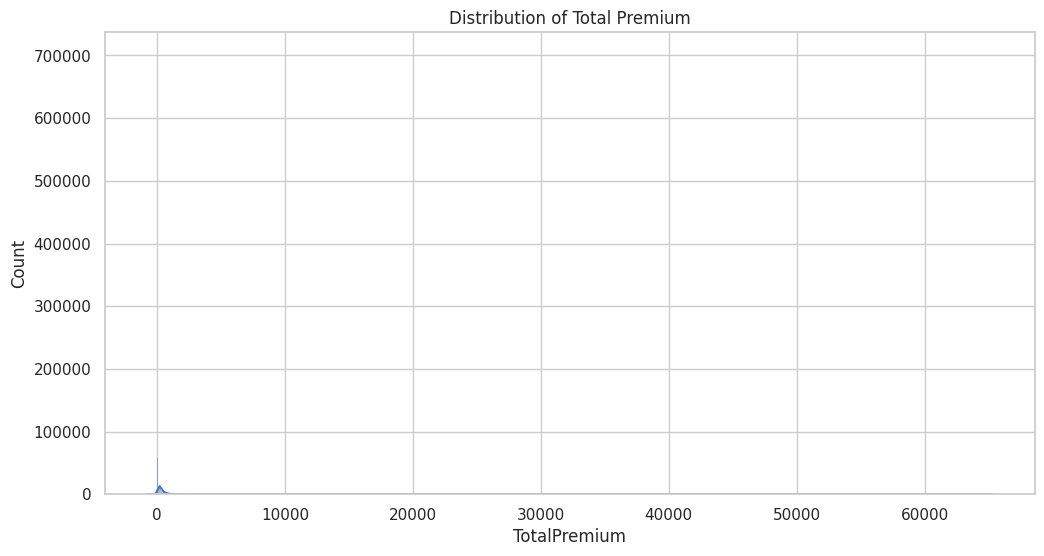

In [11]:
sns.histplot(df['TotalPremium'].dropna(), kde=True)
plt.title("Distribution of Total Premium")
plt.show()


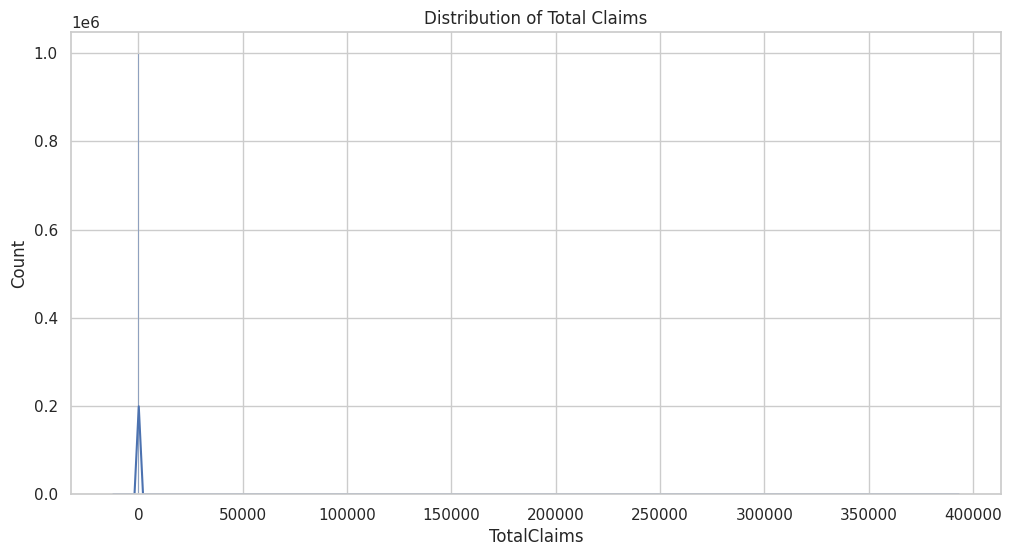

In [12]:
sns.histplot(df['TotalClaims'].dropna(), kde=True)
plt.title("Distribution of Total Claims")
plt.show()


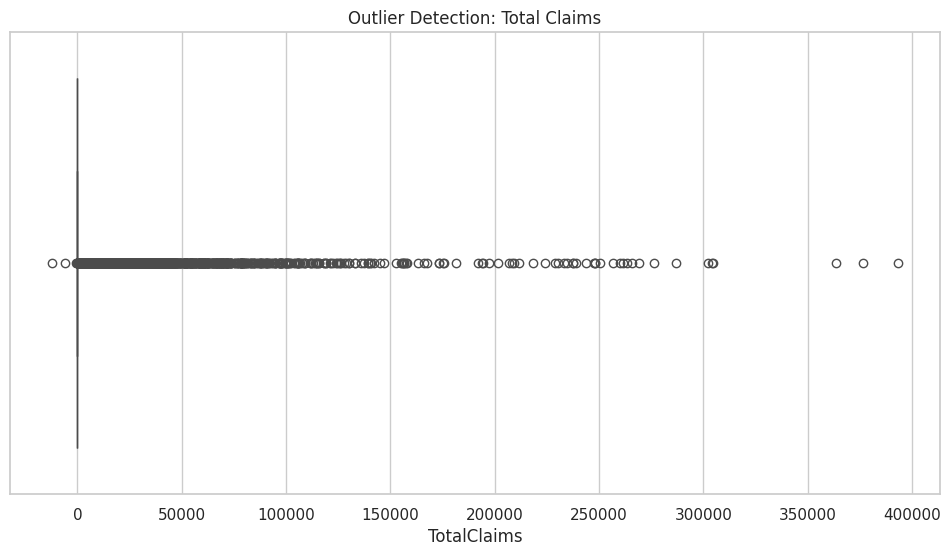

In [13]:
sns.boxplot(x=df['TotalClaims'])
plt.title("Outlier Detection: Total Claims")
plt.show()


## 🔗 Bivariate Analysis


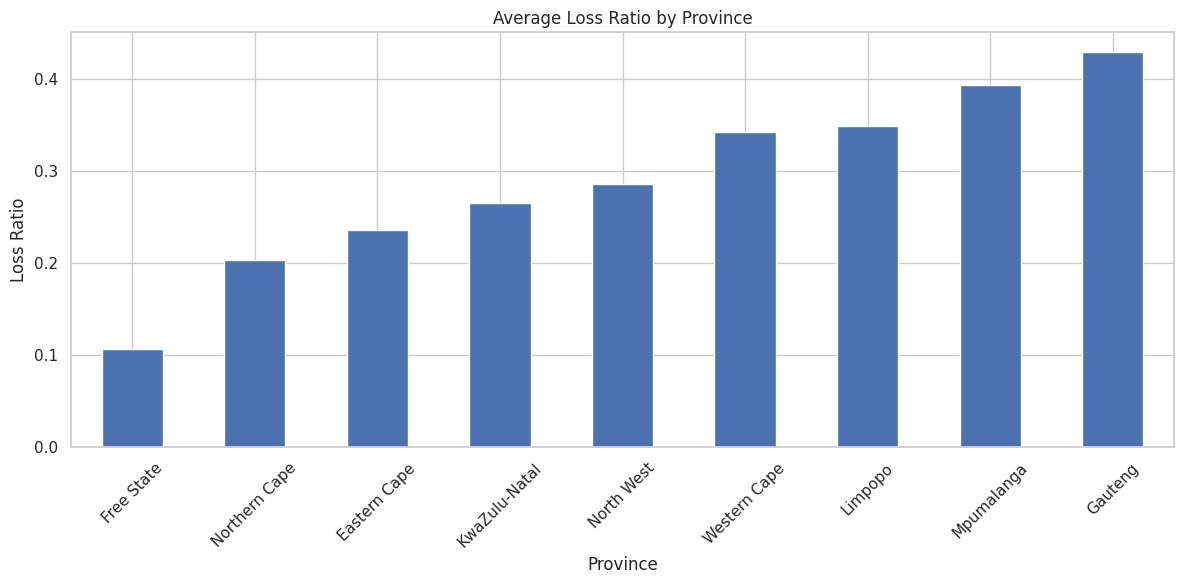

In [14]:
# Loss Ratio by Province
df.groupby('Province')['LossRatio'].mean().sort_values().plot(kind='bar')
plt.title("Average Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


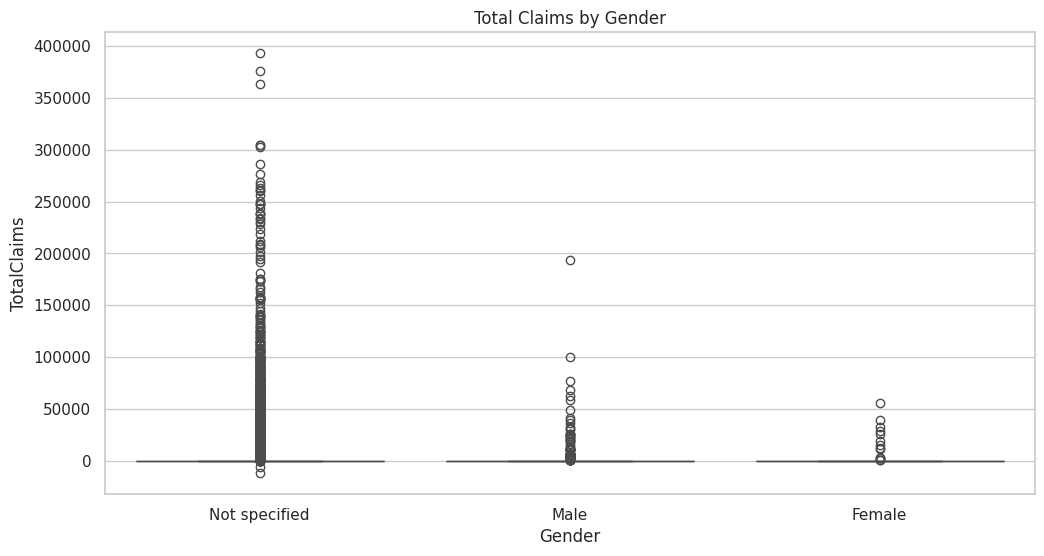

In [15]:
# Claim severity by gender
sns.boxplot(x='Gender', y='TotalClaims', data=df)
plt.title("Total Claims by Gender")
plt.show()


## 🕒 Temporal Trends


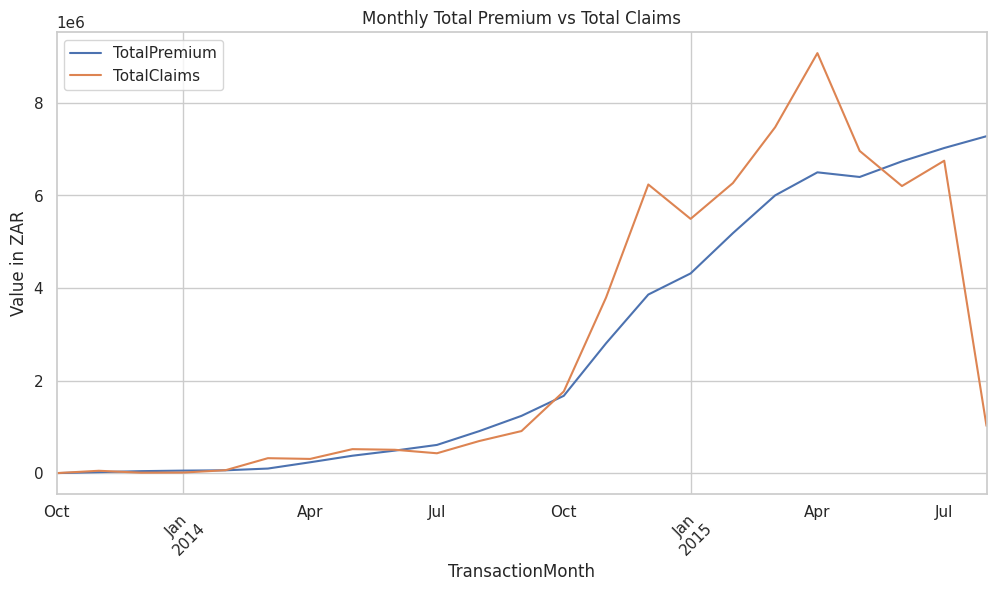

In [16]:
monthly = df.groupby(df['TransactionMonth'].dt.to_period("M")).agg({'TotalPremium':'sum', 'TotalClaims':'sum'})
monthly.index = monthly.index.to_timestamp()
monthly.plot()
plt.title("Monthly Total Premium vs Total Claims")
plt.ylabel("Value in ZAR")
plt.xticks(rotation=45)
plt.show()


## 💾 Save Key Plots


In [17]:
# Save example plot
plt.figure()
df.groupby('Province')['LossRatio'].mean().sort_values().plot(kind='bar')
plt.title("Average Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../plots/loss_ratio_by_province.png")
plt.close()


## ✅ Key Takeaways

- Gauteng has the highest average loss ratio.
- Loss ratio varies significantly by Province and VehicleType.
- Claim values are highly skewed — requires log transformation or outlier handling in modeling.
- Monthly trends show peaks in certain periods, potentially linked to seasonality or policy renewal cycles.
